# Un problema de regresión logística

En este taller estudiarás conceptos mostrados en el tutorial "Solución de problemas con regresión logística", utilizando un nuevo conjunto de datos correspondiente al desempeño y desgaste de empleados. Particularmente, realizarás los siguientes procesos:

1. Cargar un conjunto de datos.
2. Preparar los datos para el modelado.
3. Realizar la búsqueda de hiperparámetros para la regresión logística.
4. Evaluar el mejor modelo resultante.

El problema a resolver es el siguiente: dadas algunas características en áreas como la educación, trabajos previos, salario, entre otras, queremos clasificar a un empleado como agotado (con bajo desempeño) o no. Antes de iniciar, vamos a importar las librerías necesarias:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

## 1. Carga de datos

Con las librerías importadas, realizaremos la carga del conjunto de datos:

### Ejercicio 1.1.

Utiliza Pandas para importar el archivo que contiene el conjunto de datos de desgaste de empleados.

* La ruta del archivo .csv es: `./data/EmployeeAttrition.csv`, y ya se encuentra en el entorno de Coursera, solo debes importarlo.
* La variable resultante debe tener el nombre `data_raw`, que representa el conjunto de datos sin modificar.

In [2]:
ruta = './data/Employee-Attrition.csv'
# your code here
data_raw = pd.read_csv(ruta)

In [3]:
data_raw.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [4]:
#---------- Celda de Pruebas ----------
# El resultado existe
# El resultado es un DataFrame
# El resultado tiene las dimensiones correctas
#--------------------------------------

# Se verifica que la variable exista
assert data_raw is not None, "Asegúrate de definir la variable /`data_raw/` igualándola a una función de Pandas para leer el archivo."

# Se verifica que sea un DataFrame
assert isinstance(data_raw, pd.DataFrame), "El resultado debe ser un DataFrame."

# Se evalúan las dimensiones de la variable
assert data_raw.shape == (1470,32), "¿Verificaste que la ruta del archivo CSV y el nombre de la variable son correctos?"
print("¡Los datos tienen las dimensiones correctas!")

¡Los datos tienen las dimensiones correctas!


In [5]:
data_raw.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

En este punto es conveniente observar la estructura de los datos. ¿Cuántas variables categóricas tiene este conjunto de datos?

In [6]:
pd.value_counts(data_raw['BusinessTravel'])

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

## 2. Preparación de datos

Primero vamos a definir la variable `data` para almacenar un conjunto de datos modificado:

In [7]:
data = data_raw.copy()

A continuación, verificaremos si hay valores faltantes:

In [8]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

Y verificaremos si hay filas duplicadas:

In [9]:
data.duplicated().sum()

0

Como puedes observar, no tenemos que hacer una limpieza previa, por lo que seguiremos con la preparación de los datos.

### Ejercicio 2.1.

Primero vas a realizar la transformación de las variables categóricas. Utiliza Pandas para transformar todas las variables categóricas en variables numéricas que puedan ser interpretadas por nuestro modelo.

* Utiliza una función de Pandas y asigna tu respuesta a la misma variable `data`. (**Ejemplo: `data = pd.<<Función>>`**)
* Encontrarás la línea `data.head()` al final de la celda. Esta línea se usa para que puedas visualizar el resultado de la transformación, por lo que debes dejarla al final y no debes modificarla.

In [10]:
data_raw.shape

(1470, 32)

In [11]:
# your code here
data = pd.get_dummies(data)
data.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,1,2,94,3,2,...,0,0,0,1,0,0,0,1,0,1
1,49,0,279,8,1,2,3,61,2,2,...,0,0,1,0,0,0,1,0,1,0
2,37,1,1373,2,2,4,4,92,2,1,...,0,0,0,0,0,0,0,1,0,1
3,33,0,1392,3,4,5,4,56,3,1,...,0,0,1,0,0,0,1,0,0,1
4,27,0,591,2,1,7,1,40,3,1,...,0,0,0,0,0,0,1,0,1,0


In [12]:
#---------- Celda de Pruebas ----------
# La variable 'data' existe
# La variable 'data' es un DataFrame
# La variable 'data' ha aumentado su número de columnas
#--------------------------------------

# Se verifica que la variable exista
assert data is not None, "Asegúrate de definir la variable /`data/` igualándola a una función de Pandas."

# Se verifica que sea un DataFrame
assert isinstance(data, pd.DataFrame), "El resultado debe ser un DataFrame."

# Se evalúan las dimensiones de la variable data
assert data.shape == (1470,53), "Recuerda que la codificación de variables categóricas resulta en un aumento del número de columnas."
print("¡Los datos tienen las dimensiones correctas!")

¡Los datos tienen las dimensiones correctas!


### Ejercicio 2.2.

Ahora debes dividir el conjunto de datos en entrenamiento y pruebas. Usando el 80% de los datos para entrenar el modelo y el 20% restante para probarlo, utiliza `scikit-learn` para separar el conjunto de datos en dos.

* Guarda tu respuesta en dos variables: `train` y `test`. (**Ejemplo: `train, test = <<Función>>`**)
* Utiliza el parámetro `random_state=0`. Esto hará que la partición sea siempre la misma.
* Encontrarás la línea `train.head()`. Esta línea se usa para que puedas visualizar el resultado del conjunto de entrenamiento. Déjala al final de la celda y no la modifiques.

In [13]:
# your code here
train, test = train_test_split(data, test_size=0.2, random_state=0)
train.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
1374,58,0,605,21,3,1938,4,72,3,4,...,0,0,0,0,0,0,1,0,0,1
1092,45,0,950,28,3,1546,4,97,3,1,...,0,0,1,0,0,0,1,0,1,0
768,40,0,300,26,3,1066,3,74,3,2,...,0,0,0,1,0,0,1,0,1,0
569,36,0,1434,8,4,789,1,76,2,3,...,0,0,0,1,0,0,0,1,1,0
911,25,1,599,24,1,1273,3,73,1,1,...,0,0,0,0,1,0,0,1,0,1


In [14]:
#---------- Celda de Pruebas ----------
# Las variables "train" y "test" existen
# Las variables "train" y "test" son un DataFrame
# Las variables tienen las dimensiones correctas
#--------------------------------------

# Se verifica que "train" y "test" están definidas
assert train is not None, "Asegúrate de definir la variable \'train\' con el nombre correcto."
assert test is not None, "Asegúrate de definir la variable \'test\' con el nombre correcto."

# Se verifica que "train" y "test" sean un DataFrame
assert isinstance(train, pd.DataFrame), "La variable \'train\' debe ser un DataFrame."
assert isinstance(test, pd.DataFrame), "La variable \'test\' debe ser un DataFrame."

# Se evalúan las dimensiones de las variables
assert train.shape == (1176,53), "Verifica que estés utilizando el 80% de los datos para el conjunto de entrenamiento."
assert test.shape == (294,53), "Verifica que estés utilizando el 20% de los datos para el conjunto de pruebas."
print("¡Los conjuntos de entrenamiento y pruebas tienen las dimensiones correctas!")

¡Los conjuntos de entrenamiento y pruebas tienen las dimensiones correctas!


### Ejercicio 2.3.

Ahora debes aislar la variable objetivo, `Attrition`, de las variables independientes. Utiliza Pandas para crear dos variables, `x_train` y `y_train`, que almacenarán las variables independientes y la variable objetivo, respectivamente.

* Crea una variable con nombre `x_train` y asígnale la operación necesaria para almacenar solo las variables independientes del conjunto de entrenamiento. (**Ejemplo: `x_train = train.<<Función>>`**)
* Crea una variable con nombre `y_train` y asígnale la operación necesaria para almacenar la variable objetivo del conjunto de entrenamiento. (**Ejemplo: `y_train = <<Consulta>>`**)

In [15]:
# Tu respuesta deben ser dos líneas consecutivas:
#    x_train = train.<<Función>>
#    y_train = <<Consulta>>
# your code here
x_train = train.drop(['Attrition'],axis=1)
y_train = train['Attrition']

In [16]:
#---------- Celda de Pruebas ----------
# Las variables "x_train" y "y_train" existen
# La variable "x_train" es un DataFrame
# La variable "y_train" es una Serie de Pandas
# Las variables tienen las dimensiones correctas
#--------------------------------------

# Se verifica que las variables están definidas
assert x_train is not None, "Asegúrate de definir la variable \'x_train\' correctamente."
assert y_train is not None, "Asegúrate de definir la variable \'y_train\' correctamente."

# Se verifica que "x_train" sea un DataFrame
assert isinstance(x_train, pd.DataFrame), "El resultado debe ser un DataFrame."

# Se verifica que "y_train" sea una Serie
assert isinstance(y_train, pd.Series), "El resultado debe ser una Serie de Pandas."

# Se evalúan las dimensiones de las variables
assert x_train.shape == (1176,52), "\'x_train\' debe tener el mismo número de filas pero una columna menos que \'train\'."
assert y_train.shape == (1176,), "\'y_train\' solamente contiene una columna."
print("¡Los conjuntos \'x_train\' y \'y_train\' tienen las dimensiones correctas!")

¡Los conjuntos 'x_train' y 'y_train' tienen las dimensiones correctas!


### Ejercicio 2.4.

El siguiente paso es realizar la estandarización de nuestros datos. Inicialmente, vamos a almacenar los nombres de las columnas del conjunto de entrenamiento en la variable `columns`:

In [17]:
columns = x_train.columns

Adicionalmente, definiremos un objeto de la clase `StandardScaler()`, que utilizarás para realizar la estandarización:

In [18]:
scaler = StandardScaler()

Con las variables definidas, realiza la estandarización de los datos. Modifica el conjunto de variables independientes, `x_train`, con las operaciones necesarias para estandarizarlo. Particularmente, deberás seguir estos pasos:

* Utiliza la variable `scaler` para transformar los datos de `x_train`. Asigna el resultado a la misma variable sobreescribiendo su contenido. (**Ejemplo: `x_train = scaler.<<Función>>`**)
* Reconstruye el DataFrame de variables independientes utilizando la información almacenada en `columns`. Asigna el resultado a `x_train`. (**Ejemplo: `x_train = <<Función>>`**)

In [19]:
# your code here
x_train = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train, columns=columns)

In [20]:
#---------- Celda de Pruebas ----------
# La variable "x_train" es un DataFrame
# La variable tiene las dimensiones correctas
#--------------------------------------

# Se verifica que "x_train" sea un DataFrame
assert isinstance(x_train, pd.DataFrame), "El resultado debe ser un DataFrame."

# Se evalúan las dimensiones de la variable
assert x_train.shape == (1176,52), "\'x_train\' debe mantener las mismas dimensiones, solo se modifican sus valores."
print("¡\'x_train\' es un DataFrame con las dimensiones correctas!")

¡'x_train' es un DataFrame con las dimensiones correctas!


## 3. Búsqueda de hiperparámetros

Con el conjunto de entrenamiento preparado, realizaremos una búsqueda de los hiperparámetros `C`, `penalty` y `solver`. Para esto utilizaremos un objeto de la clase `KFold`, con el que definiremos 10 subconjuntos sobre el conjunto de entrenamiento:

In [21]:
kfold = KFold(n_splits=10, shuffle=True, random_state=0)

Además, definiremos el objeto de la clase `LogisticRegression` para realizar el entrenamiento con regresión logística:

In [22]:
reglog = LogisticRegression()

### Ejercicio 3.1.

El siguiente paso es definir el espacio de búsqueda de los hiperparámetros.

* Define una variable con el nombre `param_grid` y asígnale la expresión necesaria para crear un diccionario con tres tuplas (**Ejemplo: `param_grid = <<Expresión>>`**):
    * Llave `C` y valor `valores_C`.
    * Llave `penalty` y valor `valores_penalty`.
    * Llave `solver` y valor `valores_solver`.

In [23]:
valores_C = [0.1, 0.2, 0.5, 0.8, 1]
valores_penalty = ['l1', 'l2']
valores_solver = ['newton-cg', 'lbfgs', 'liblinear']
# your code here
param_grid = {'C': valores_C,
              'penalty': valores_penalty,
              'solver': valores_solver}

In [24]:
#---------- Celda de Pruebas ----------
# La variable "param_grid" existe
# La variable "param_grid" es un diccionario
# La variable tiene la longitud correcta
#--------------------------------------

# Se verifica que "param_grid" está definida
assert param_grid is not None, "Asegúrate de definir la variable \'param_grid\' correctamente."

# Se verifica que "param_grid" sea un diccionario
assert isinstance(param_grid, dict), "El resultado debe ser un diccionario de Python, es decir, no necesitas ninguna función específica de ninguna librería para definir la variable."

# Se evalúa la longitud de la variable
assert len(param_grid) == 3, "\'param_grid\' debe contener tres tuplas."
print("¡\'param_grid\' está definida correctamente!")

¡'param_grid' está definida correctamente!


### Ejercicio 3.2.

Finalmente, el último paso antes de realizar la búsqueda de hiperparámetros es crear el objeto de tipo `GridSearchCV`. Utiliza las variables `reglog`, `param_grid` y `kfold` para definirlo:

* Define una variable con el nombre `grid` y asígnale la función necesaria para crear un objeto de la clase `GridSearchCV`. (**Ejemplo: `grid = <<Función>>`**)
* Utiliza el parámetro `scoring='accuracy'` para que se seleccione el mejor modelo de acuerdo con los valores de exactitud.

In [25]:
# your code here
grid = GridSearchCV(reglog, param_grid, cv=kfold, scoring='accuracy', n_jobs=-1)

In [26]:
#---------- Celda de Pruebas ----------
# La variable "grid" existe
# La variable "grid" es un objeto de la clase GridSearchCV
# La variable "grid" usa la exactitud como método de selección
#--------------------------------------

# Se verifica que "grid" está definida
assert grid is not None, "Asegúrate de definir la variable \'grid\' correctamente."

# Se verifica que "grid" es un objeto de la clase GridSearchCV
assert type(grid) == GridSearchCV, "La variable \'grid\' debe ser un objeto de la clase GridSearchCV."

# Se verifica que "grid" tiene un atributo "scoring" igual a "accuracy"
assert grid.scoring == 'accuracy', "La variable \'grid\' debe usar la exactitud como método de selección."
print("¡\'grid\' está definida correctamente!")

¡'grid' está definida correctamente!


### Ejercicio 3.3.

A continuación, realiza la búsqueda de hiperparámetros utilizando el conjunto de entrenamiento, compuesto por las variables `x_train` y `y_train`.

* Para este ejercicio no debes asignar tu resultado a ninguna variable. Es decir, solo debes ejecutar una función sobre la variable `grid`, utilizando las variables `x_train` y `y_train` como parámetros. (**Ejemplo: `grid.<<Función>>`**)

In [27]:
# your code here
grid.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 0.2, 0.5, 0.8, 1], 'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [28]:
#---------- Celda de Pruebas ----------
# El atributo "best_params_" de la variable "grid" existe
# El atributo "best_estimator_" de la variable "grid" existe
#--------------------------------------

# El atributo "best_params_" está definido
assert grid.best_params_ is not None, "Asegúrate de ejecutar la función de entrenamiento para generar un diccionario con los mejores hiperparámetros."

# El atributo "best_estimator_" está definido
assert grid.best_estimator_ is not None, "Asegúrate de ejecutar la función de entrenamiento para generar un modelo de regresión logística."

# Se verifica que "grid" haya generado tres mejores hiperparámetros
assert len(grid.best_params_) == 3, "Al ejecutar una función usando el objeto \'grid\', se deben generar tres tuplas con los hiperparámetros."

# Se verifica que "grid" haya generado un modelo de regresión logística
assert isinstance(grid.best_estimator_, LogisticRegression), "Al ejecutar una función usando el objeto \'grid\', se debe generar un modelo de regresión logística."
print("¡Se ha realizado la búsqueda de hiperparámetros correctamente!")

¡Se ha realizado la búsqueda de hiperparámetros correctamente!


Ahora obtendremos los mejores valores de los hiperparámetros usando `grid.best_params_`:

In [29]:
print("Mejores parámetros: {}".format(grid.best_params_)) 

Mejores parámetros: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


Además, almacenaremos el mejor modelo utilizando `grid.best_estimator_`:

In [30]:
mejor_modelo = grid.best_estimator_

## 4. Evaluación del modelo

Por último, evaluarás el modelo entrenado utilizando el conjunto de pruebas.

### Ejercicio 4.1.

Separa las variables independientes y la variable objetivo en el conjunto de pruebas. Para ello, utiliza Pandas para crear dos variables, `x_test` y `y_test`, que almacenarán las variables independientes y la variable objetivo, respectivamente.

* Crea una variable con nombre `x_test` y asígnale la operación necesaria para almacenar solo las variables independientes del conjunto de pruebas. (**Ejemplo: `x_test = test.<<Función>>`**)
* Crea una variable con nombre `y_test` y asígnale la operación necesaria para almacenar la variable objetivo del conjunto de pruebas. (**Ejemplo: `y_test = <<Consulta>>`**)

In [31]:
# Tu respuesta deben ser dos líneas consecutivas:
#    x_test = test.<<Función>>
#    y_test = <<Consulta>>
# your code here
x_test = test.drop(['Attrition'],axis=1)
y_test = test['Attrition']

In [32]:
#---------- Celda de Pruebas ----------
# Las variables existen
# La variable "x_test" es un DataFrame
# La variable "y_test" es una Serie de Pandas
# Las variables tienen las dimensiones correctas
#--------------------------------------

# Se verifica que las variables están definidas
assert x_test is not None, "Asegúrate de definir la variable con el nombre correcto."
assert y_test is not None, "Asegúrate de definir la variable con el nombre correcto."

# Se verifica que "x_test" sea un DataFrame
assert isinstance(x_test, pd.DataFrame), "El resultado debe ser un DataFrame."

# Se verifica que "y_test" sea una Serie
assert isinstance(y_test, pd.Series), "El resultado debe ser una Serie de Pandas."

# Se evalúan las dimensiones de las variables
assert x_test.shape == (294,52), "\'x_test\' debe tener el mismo número de filas pero una columna menos que \'test\'."
assert y_test.shape == (294,), "\'y_test\' solamente contiene una columna."
print("¡Los conjuntos \'x_test\' y \'y_test\' tienen las dimensiones correctas!")

¡Los conjuntos 'x_test' y 'y_test' tienen las dimensiones correctas!


### Ejercicio 4.2.

Realiza la estandarización de los datos del conjunto de pruebas. Modifica el conjunto de variables independientes, `x_test`, con las operaciones necesarias para estandarizarlo. Particularmente, deberás seguir estos pasos:

* Utiliza la variable `scaler` para transformar los datos de `x_test` utilizando **solamente la información del conjunto de entrenamiento**. Asigna el resultado a la misma variable, sobreescribiendo su contenido. (**Ejemplo: `x_test = scaler.<<Función>>`**)
* Reconstruye el DataFrame de variables independientes utilizando la información almacenada en `columns`. Asigna el resultado a `x_test`. (**Ejemplo: `x_test = <<Función>>`**)

In [33]:
# your code here
x_test = scaler.transform(x_test) #?solamente la información del conjunto de entrenamiento.?
x_test = pd.DataFrame(x_test, columns=columns)

In [34]:
#---------- Celda de Pruebas ----------
# La variable "x_test" es un DataFrame
# La variable tiene las dimensiones correctas
#--------------------------------------

# Se verifica que "x_test" sea un DataFrame
assert isinstance(x_test, pd.DataFrame), "El resultado debe ser un DataFrame."

# Se evalúan las dimensiones de la variable
assert x_test.shape == (294,52), "\'x_test\' debe mantener las mismas dimensiones, solo se modifican sus valores."
print("¡\'x_test\' es un DataFrame con las dimensiones correctas!")

¡'x_test' es un DataFrame con las dimensiones correctas!


### Ejercicio 4.3.

Con el conjunto de pruebas preparado, realiza predicciones con el fin de compararlas con los valores reales almacenados en `y_test`.

* Utiliza la variable `mejor_modelo` para realizar las predicciones sobre el mejor modelo. Asigna el resultado a una variable con nombre `y_pred` (**Ejemplo: `y_pred = mejor_modelo.<<Función>>`**).

In [35]:
# your code here
y_pred = mejor_modelo.predict(x_test)

In [36]:
#---------- Celda de Pruebas ----------
# La variable "y_pred" existe
# La variable "y_pred" es un arreglo
# La variable "y_pred" tiene las dimensiones correctas
#--------------------------------------

# Se verifica que "y_pred" está definida
assert y_pred is not None, "Asegúrate de definir la variable con el nombre correcto."

# Se verifica que "y_pred" sea un arreglo
assert isinstance(y_pred, np.ndarray), "El resultado debe ser un arreglo de Numpy."

# Se evalúan las dimensiones de "y_pred"
assert y_pred.shape == (294,), "\'y_pred\' debe tener el mismo número de filas (predicciones) que \'x_test\' y \'y_test\'."
print("¡\'y_pred\' es un arreglo con las dimensiones correctas!")

¡'y_pred' es un arreglo con las dimensiones correctas!


### Ejercicio 4.4.

Utiliza el conjunto de predicciones `y_pred` y el conjunto de valores reales `y_test` para obtener la matriz de confusión del mejor modelo.

* Haz un llamado a la función que retorna la matriz de confusión como un arreglo. Asigna el resultado a una nueva variable con el nombre `p44` (**Ejemplo: `p44 = <<Función>>`**).
* Encontrarás la línea `p44` al final de la celda. Esta línea se usa para que puedas visualizar la matriz resultante, por lo que no la debes modificar.

In [37]:
# your code here
p44 = confusion_matrix(y_test, y_pred)
p44

array([[241,   4],
       [ 29,  20]])

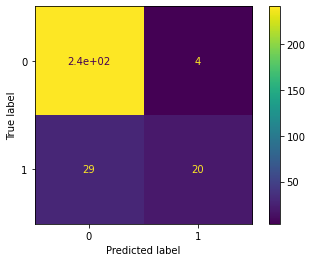

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mejor_modelo, x_test, y_test)  
plt.show()

In [39]:
#---------- Celda de Pruebas ----------
# La variable "p44" existe
# La variable "p44" es un arreglo de numpy
# La variable "p44" tiene las dimensiones correctas
#--------------------------------------

# Se verifica que "p44" está definida
assert p44 is not None, "Asegúrate de definir la variable con el nombre correcto."

# Se verifica que "p44" sea un arreglo de numpy
assert isinstance(p44, np.ndarray), "El resultado debe ser un arreglo de Numpy."

# Se evalúan las dimensiones de "p44"
assert p44.shape == (2,2), "\'p44\' debe tener dos filas y dos columnas, equivalente al número de clases del problema."
print("¡\'p44\' es un arreglo con las dimensiones correctas!")

¡'p44' es un arreglo con las dimensiones correctas!


### Ejercicio 4.5.

Finalmente, obtén cuatro métricas de rendimiento utilizando las predicciones del modelo.

#### Ejercicio 4.5.1.

Utiliza `scikit-learn` para obtener la exactitud (accuracy).

* Define una variable con el nombre `accuracy` y asígnale la función necesaria para obtener la exactitud (`accuracy = <<Función>>`).
* Encontrarás una línea que mostrará tu resultado. Esta línea debe ir al final y no la debes modificar.

In [40]:
# your code here
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud: ", accuracy)

Exactitud:  0.8877551020408163


In [41]:
#---------- Celda de Pruebas ----------
# La variable "accuracy" existe
# La variable "accuracy" es un número
# La variable "accuracy" tiene un valor válido
#--------------------------------------

# Se verifica que "accuracy" está definida
assert accuracy is not None, "Asegúrate de definir la variable con el nombre correcto."

# Se verifica que "accuracy" sea un número
assert isinstance(accuracy, np.float64) or isinstance(accuracy, float), "El resultado debe ser un número decimal."

# Se verifica que "accuracy" tiene un valor válido
assert accuracy >= 0 and accuracy <= 1, "\'accuracy\' debe tener un valor entre 0 y 1."
print("¡\'accuracy\' es un número válido!")

¡'accuracy' es un número válido!


#### Ejercicio 4.5.2.

Utiliza `scikit-learn` para obtener la sensibilidad (recall).

* Define una variable con el nombre `recall` y asígnale la función necesaria para obtener la sensibilidad (`recall = <<Función>>`).
* Encontrarás una línea que mostrará tu resultado. Esta línea debe ir al final y no la debes modificar.

In [42]:
# your code here
recall = recall_score(y_test,y_pred)
print("Sensibilidad: ", recall)

Sensibilidad:  0.40816326530612246


In [43]:
#---------- Celda de Pruebas ----------
# La variable "recall" existe
# La variable "recall" es un número
# La variable "recall" tiene un valor válido
#--------------------------------------

# Se verifica que "recall" está definida
assert recall is not None, "Asegúrate de definir la variable con el nombre correcto."

# Se verifica que "recall" sea un número
assert isinstance(recall, np.float64) or isinstance(recall, float), "El resultado debe ser un número decimal."

# Se verifica que "recall" tiene un valor válido
assert recall >= 0 and recall <= 1, "\'recall\' debe tener un valor entre 0 y 1."
print("¡\'recall\' es un número válido!")

¡'recall' es un número válido!


#### Ejercicio 4.5.3.

Utiliza `scikit-learn` para obtener la precisión.

* Define una variable con el nombre `precision` y asígnale la función necesaria para obtener la precisión (`precision = <<Función>>`).
* Encontrarás una línea que mostrará tu resultado. Esta línea debe ir al final y no la debes modificar.

In [44]:
# your code here
precision = precision_score(y_test,y_pred)
print('Precisión: ', precision)

Precisión:  0.8333333333333334


In [45]:
#---------- Celda de Pruebas ----------
# La variable "precision" existe
# La variable "precision" es un número
# La variable "precision" tiene un valor válido
#--------------------------------------

# Se verifica que "precision" está definida
assert precision is not None, "Asegúrate de definir la variable con el nombre correcto."

# Se verifica que "precision" sea un número
assert isinstance(precision, np.float64) or isinstance(precision, float), "El resultado debe ser un número decimal."

# Se verifica que "precision" tiene un valor válido
assert precision >= 0 and precision <= 1, "\'precision\' debe tener un valor entre 0 y 1."
print("¡\'precision\' es un número válido!")

¡'precision' es un número válido!


#### Ejercicio 4.5.4.

Utiliza `scikit-learn` para obtener el F1-Score.

* Define una variable con el nombre `f1_score` y asígnale la función necesaria para obtener el F1-Score (`f1_score = <<Función>>`).
* Encontrarás una línea que mostrará tu resultado. Esta línea debe ir al final y no la debes modificar.

In [46]:
# your code here
f1_score = f1_score(y_test,y_pred)
print('F1-Score: ', f1_score)

F1-Score:  0.547945205479452


In [47]:
#---------- Celda de Pruebas ----------
# La variable "f1_score" existe
# La variable "f1_score" es un número
# La variable "f1_score" tiene un valor válido
#--------------------------------------

# Se verifica que "f1_score" está definida
assert f1_score is not None, "Asegúrate de definir la variable con el nombre correcto."

# Se verifica que "f1_score" sea un número
assert isinstance(f1_score, np.float64) or isinstance(f1_score, float), "El resultado debe ser un número decimal."

# Se verifica que "f1_score" tiene un valor válido
assert f1_score >= 0 and f1_score <= 1, "\'f1_score\' debe tener un valor entre 0 y 1."
print("¡\'f1_score\' es un número válido!")

¡'f1_score' es un número válido!


In [48]:
from sklearn.metrics import confusion_matrix, classification_report

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94       245
           1       0.83      0.41      0.55        49

    accuracy                           0.89       294
   macro avg       0.86      0.70      0.74       294
weighted avg       0.88      0.89      0.87       294



## Cierre

Al realizar los ejercicios de este taller, has reforzado tus capacidades para codificar variables categóricas usando la codificación One Hot, realizar una búsqueda exhaustiva de hiperparámetros y evaluar el mejor modelo de regresión logística resultante utilizando la matriz de confusión y cuatro métricas de rendimiento. 

---
*Creado por: Nicolás Díaz*  
*Revisado por: Haydemar Nuñez*  
*Versión de: Agosto 30, 2023*  
*Universidad de los Andes*   